Jupyter notebook to do statistics on PHI-base4.17 EggNogMapper annotation output file to support NAR 2025 manuscript

In [1]:
print("Hello")


Hello


In [2]:
import pandas as pd

# Load the EggNOG annotation file
#Note: I manually deleted the first 4 comments line and removed the ' from the header line [Do not import the file into Excel!]
annotation_file = 'phi417_output.emapper-Copy.annotations'
df = pd.read_csv(annotation_file, sep='\t')

# Display the first few rows to understand the structure
print(df.head())

                                               query           seed_ortholog  \
0  A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...   568076.XP_007824680.1   
1  A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...   568076.XP_007825894.1   
2  A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...     5551.XP_003238727.1   
3  A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...      273526.SMDB11_3959   
4  A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...  55601.VANGNB10_cI1529c   

          evalue   score                                         eggNOG_OGs  \
0   0.000000e+00  1338.0  COG5309@1|root,2QTKT@2759|Eukaryota,39SDA@3315...   
1   0.000000e+00  1095.0  2F28N@1|root,2T36R@2759|Eukaryota,38X15@33154|...   
2   0.000000e+00  1187.0  28PEI@1|root,2QW2C@2759|Eukaryota,398TP@33154|...   
3  1.510000e-200   555.0  COG0745@1|root,COG0745@2|Bacteria,1N6V8@1224|P...   
4   0.000000e+00  3371.0  COG2931@1|root,COG3064@1|root,COG2931@2|Bacter...   

              max_annot_lvl COG_category  \


In [3]:
# Assuming 'COG_category' is the column with the COG function categories
cog_categories = df['COG_category'].dropna().str.split(',').explode()
# Create a copy of cog_categories for future exploration
cog_categories_copy = cog_categories.copy()

# Remove COG entries with a 2-letter code
cog_categories = cog_categories[cog_categories.str.len() == 1]
# Summarize the number of proteins in each COG category
cog_summary = cog_categories.value_counts().reset_index()
cog_summary.columns = ['COG_category', 'Count']

# Display the summary
print(cog_summary)



   COG_category  Count
0             S   1716
1             K   1016
2             T    781
3             -    494
4             M    454
5             G    439
6             O    397
7             U    346
8             P    308
9             E    290
10            Q    274
11            C    238
12            I    218
13            H    183
14            L    153
15            F    135
16            J    134
17            B    114
18            D     86
19            A     72
20            V     66
21            Z     62
22            N     61
23            W      2


Column Names: Index(['query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')
                                               query           seed_ortholog  \
0  A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...   568076.XP_007824680.1   
1  A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...   568076.XP_007825894.1   
2  A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...     5551.XP_003238727.1   
3  A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...      273526.SMDB11_3959   
4  A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...  55601.VANGNB10_cI1529c   

          evalue   score                                         eggNOG_OGs  \
0   0.000000e+00  1338.0  COG5309@1|root,2QTKT@2759|Eukaryota,39SDA@3315...   
1   0.000000e+00  1095.0  2F28

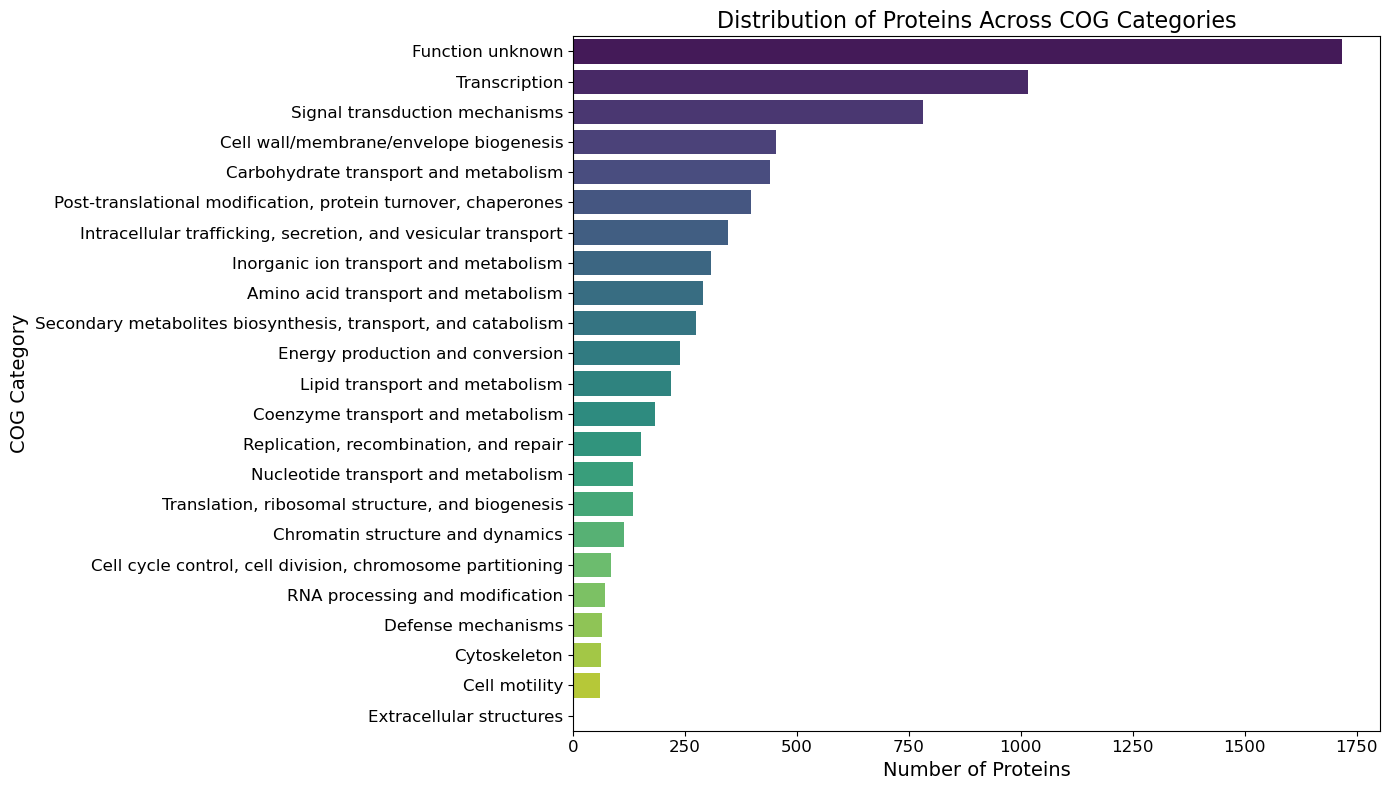

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# COG category mapping
cog_category_mapping = {
    'A': 'RNA processing and modification',
    'B': 'Chromatin structure and dynamics',
    'C': 'Energy production and conversion',
    'D': 'Cell cycle control, cell division, chromosome partitioning',
    'E': 'Amino acid transport and metabolism',
    'F': 'Nucleotide transport and metabolism',
    'G': 'Carbohydrate transport and metabolism',
    'H': 'Coenzyme transport and metabolism',
    'I': 'Lipid transport and metabolism',
    'J': 'Translation, ribosomal structure, and biogenesis',
    'K': 'Transcription',
    'L': 'Replication, recombination, and repair',
    'M': 'Cell wall/membrane/envelope biogenesis',
    'N': 'Cell motility',
    'O': 'Post-translational modification, protein turnover, chaperones',
    'P': 'Inorganic ion transport and metabolism',
    'Q': 'Secondary metabolites biosynthesis, transport, and catabolism',
    'R': 'General function prediction only',
    'S': 'Function unknown',
    'T': 'Signal transduction mechanisms',
    'U': 'Intracellular trafficking, secretion, and vesicular transport',
    'V': 'Defense mechanisms',
    'W': 'Extracellular structures',
    'Y': 'Nuclear structure',
    'Z': 'Cytoskeleton',
}

# Assuming df is your dataframe containing the annotations file
# Display the first few rows to understand the structure
print("Column Names:", df.columns)
print(df.head())

# Extract and categorize COG functions
cog_categories = df['COG_category'].dropna().str.split(',').explode()

# Remove COG entries with a 2-letter code
cog_categories = cog_categories[cog_categories.str.len() == 1]

# Map the one-letter codes to full word labels
cog_categories = cog_categories.map(cog_category_mapping)

# Summarize the number of proteins in each COG category
cog_summary = cog_categories.value_counts().reset_index()
cog_summary.columns = ['COG_category', 'Count']

# Sort COG categories for better visualization
cog_summary = cog_summary.sort_values(by='Count', ascending=False)

# Horizontal bar plot of COG categories
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='COG_category', data=cog_summary, palette='viridis')
plt.ylabel('COG Category', fontsize=14)
plt.xlabel('Number of Proteins', fontsize=14)
plt.title('Distribution of Proteins Across COG Categories', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()



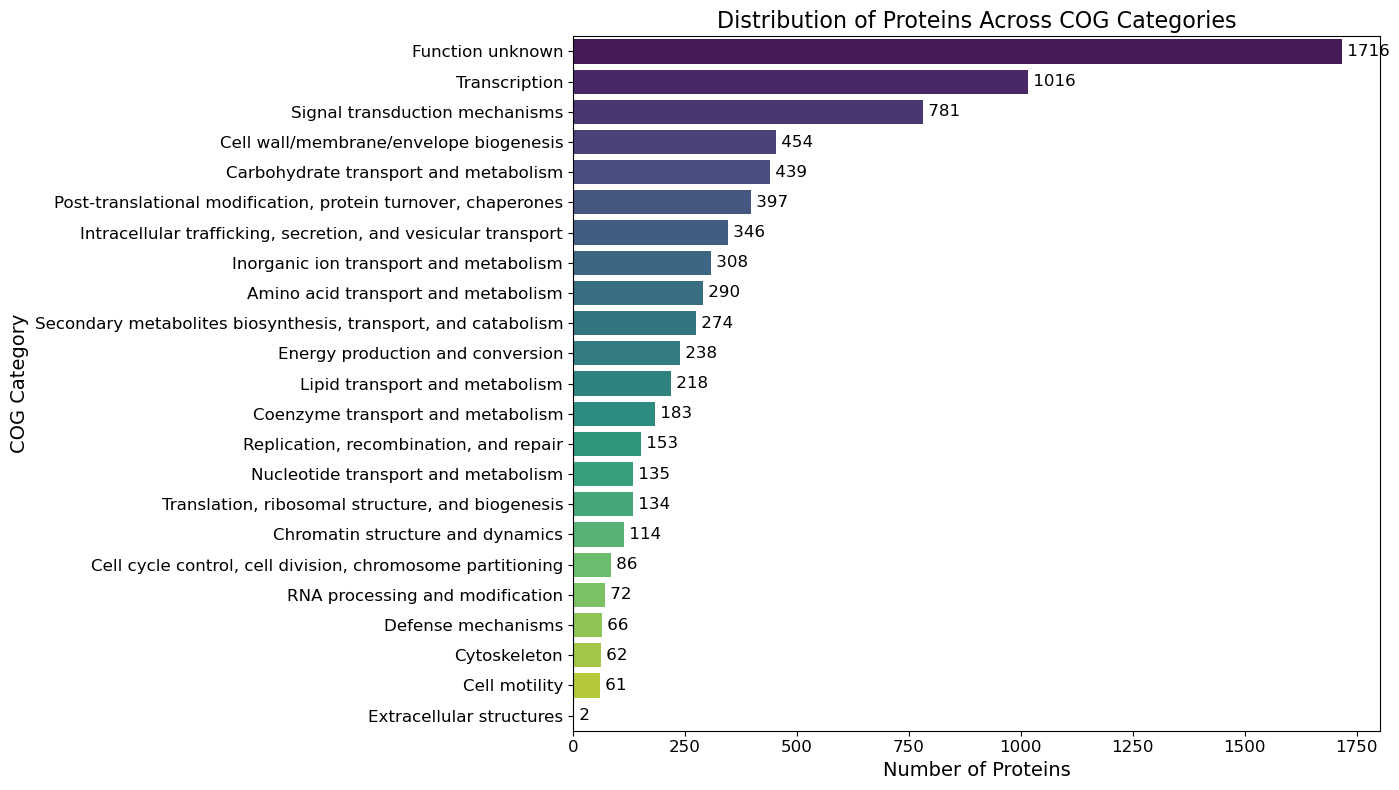

In [66]:
# Horizontal bar plot of COG categories
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', y='COG_category', data=cog_summary, palette='viridis')
plt.ylabel('COG Category', fontsize=14)
plt.xlabel('Number of Proteins', fontsize=14)
plt.title('Distribution of Proteins Across COG Categories', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add text annotations inside the bars
for index, value in enumerate(cog_summary['Count']):
    ax.text(value, index, f' {value}', color='black', va="center", fontsize=12)

plt.tight_layout()
# Save plxt as SVG file
plt.savefig("cog_category_distribution.svg", format='svg')
# Show plot
plt.show()

In [5]:
#show first 10 entries of first column as test
print(df.iloc[:10, 0])


0    A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...
1    A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...
2    A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...
3    A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...
4    A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...
5    A0A023SIL4#PHI:12135#EsxA1#1311#Streptococcus_...
6    A0A023Y9U3#PHI:3462#RpfF#40324#Stenotrophomona...
7    A0A024CHY2#PHI:2935#CifB#36746#Pseudomonas_cic...
8    A0A024CHY4#PHI:4837#CipA#36746#Pseudomonas_cic...
9    A0A024CIG8#PHI:2934#CifA#36746#Pseudomonas_cic...
Name: query, dtype: object


### Extract NCBI Taxonomy ID fro PHI-Fasta header and put as first column into the annotation_file variable

In [6]:
df_backup_copy =df.copy()


In [7]:
# Assuming annotation_file_copy is your dataframe containing the annotations file
# Display the first few rows to understand the structure
print("Column Names:", df.columns)
print(df.head())

Column Names: Index(['query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')
                                               query           seed_ortholog  \
0  A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...   568076.XP_007824680.1   
1  A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...   568076.XP_007825894.1   
2  A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...     5551.XP_003238727.1   
3  A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...      273526.SMDB11_3959   
4  A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...  55601.VANGNB10_cI1529c   

          evalue   score                                         eggNOG_OGs  \
0   0.000000e+00  1338.0  COG5309@1|root,2QTKT@2759|Eukaryota,39SDA@3315...   
1   0.000000e+00  1095.0  2F28

In [8]:
# Extract the NCBI taxonomy ID (5th element in the string)
df['NCBI_Taxonomy_ID'] = df.iloc[:, 0].str.split('#').str[3]

# Reorder columns to make NCBI_Taxonomy_ID the first column
columns = ['NCBI_Taxonomy_ID'] + df.columns[:-1].tolist()
df = df[columns]

# Display the first few rows to verify the changes
print(df.head())

  NCBI_Taxonomy_ID                                              query  \
0            92637  A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...   
1           568076  A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...   
2             5551  A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...   
3              615  A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...   
4              672  A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...   

            seed_ortholog         evalue   score  \
0   568076.XP_007824680.1   0.000000e+00  1338.0   
1   568076.XP_007825894.1   0.000000e+00  1095.0   
2     5551.XP_003238727.1   0.000000e+00  1187.0   
3      273526.SMDB11_3959  1.510000e-200   555.0   
4  55601.VANGNB10_cI1529c   0.000000e+00  3371.0   

                                          eggNOG_OGs  \
0  COG5309@1|root,2QTKT@2759|Eukaryota,39SDA@3315...   
1  2F28N@1|root,2T36R@2759|Eukaryota,38X15@33154|...   
2  28PEI@1|root,2QW2C@2759|Eukaryota,398TP@33154|...   
3  COG0745@1|root,COG074

In [9]:
# Find the number of unique NCBI taxonomy IDs
num_unique_tax_ids = df['NCBI_Taxonomy_ID'].nunique()
print(f"Number of unique NCBI taxonomy IDs: {num_unique_tax_ids}")

Number of unique NCBI taxonomy IDs: 287


### For species group analysis, define pathogen taxonomy slices

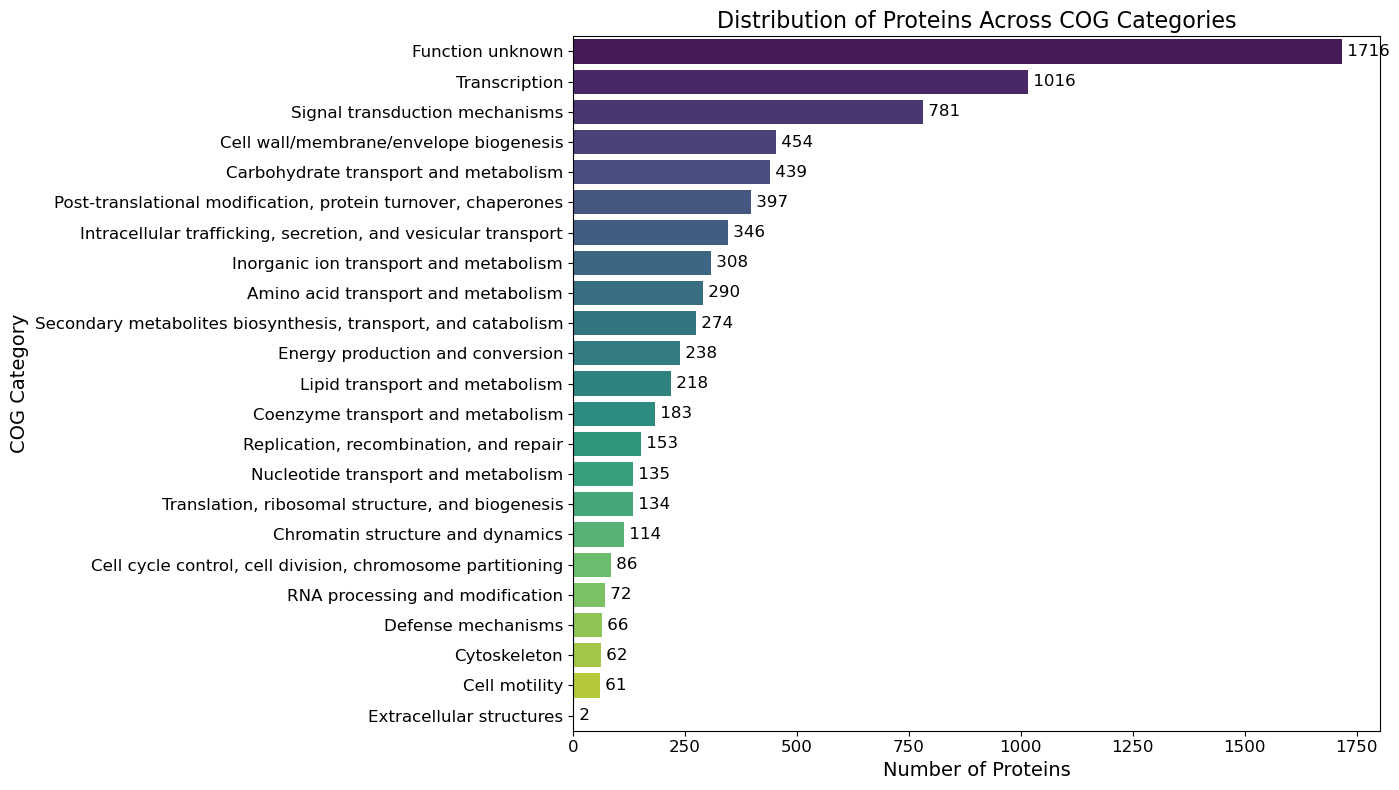

In [10]:
# Horizontal bar plot of COG categories
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', y='COG_category', data=cog_summary, palette='viridis')
plt.ylabel('COG Category', fontsize=14)
plt.xlabel('Number of Proteins', fontsize=14)
plt.title('Distribution of Proteins Across COG Categories', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add text annotations inside the bars
for index, value in enumerate(cog_summary['Count']):
    ax.text(value, index, f' {value}', color='black', va="center", fontsize=12)

plt.tight_layout()
# Save plxt as SVG file
plt.savefig("cog_category_distribution.svg", format='svg')
# Show plot
plt.show()

## Now  I need to generate the files ' Plant pathogen (not wheat)' and 'Animal pathogen' from file non_wheat_pathogens_file

**Data files** are located at: fungi_rawdat:\JupyterStatistics\Phi417_eggnog_output\data #for **jupyter processing**

**Master species list** is located at: \\salt\fus_video\1_PROJECTS\PRO_PHIBASE_R\2024_NAR-Manuscript\SPECIES LISTS\
**Sub-species TaxID lists** generated in vim at 10_VIMdb/PHI-base/PHI417=CURRENT=NAR2025/


In [11]:
# Load the wheat and non-wheat pathogen taxonomy IDs from files directly from 10_VIMdb/PHI-base/PHI417=CURRENT=NAR2025/
wheat_pathogens_file = 'X:/10_VIMdb/PHI-base/Phi417=CURRENT=NAR2025/phiSpecies/21_all_wheat_pathogens.txt'
with open(wheat_pathogens_file, 'r') as file:
    wheat_pathogen_tax_ids = file.read().splitlines()
# Load the wheat and non-wheat pathogen taxonomy IDs from files directly from 10_VIMdb/PHI-base/PHI417=CURRENT=NAR2025/
plant_nonWheat_pathogens_file = 'X:/10_VIMdb/PHI-base/Phi417=CURRENT=NAR2025/phiSpecies/154-nonWheatPathogens.txt'
with open(plant_nonWheat_pathogens_file, 'r') as file:
    plantNonWheat_pathogen_tax_ids = file.read().splitlines()
#read non-plant taxIds 
animal_pathogen_file = 'X:/10_VIMdb/PHI-base/Phi417=CURRENT=NAR2025/phiSpecies/162-nonPlant-AnimalOtherPathogens.txt'
with open(animal_pathogen_file, 'r') as file:
    animal_pathogen_tax_ids = file.read().splitlines()

# Print the first 10 lines from each file to check the reading was successful
print("First 10 wheat pathogen taxonomy IDs:")
print(wheat_pathogen_tax_ids[:10])

# Print the first 10 lines from each file to check the reading was successful
print("First 10 plant_nonWheat pathogen taxonomy IDs:")
print(plantNonWheat_pathogen_tax_ids[:10])


# Print the first 10 lines from each file to check the reading was successful
print("First 10 animal+others taxonomy IDs:")
print(animal_pathogen_tax_ids[:10])

First 10 wheat pathogen taxonomy IDs:
['101028', '1047171', '117187', '13684', '208348', '27350', '282267', '294', '29850', '317']
First 10 plant_nonWheat pathogen taxonomy IDs:
['100787', '101162', '105487', '1089444', '1159556', '120017', '122368', '123356', '129394', '13131']
First 10 animal+others taxonomy IDs:
['106654', '121759', '1263550', '1280', '1282', '1306', '1307', '1309', '1311', '1313']


In [12]:
# Assuming df is your DataFrame containing the annotations file
# Display the first few rows to understand the structure
print("Column Names:", df.columns)
print(df.head())

Column Names: Index(['NCBI_Taxonomy_ID', 'query', 'seed_ortholog', 'evalue', 'score',
       'eggNOG_OGs', 'max_annot_lvl', 'COG_category', 'Description',
       'Preferred_name', 'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module',
       'KEGG_Reaction', 'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy',
       'BiGG_Reaction', 'PFAMs'],
      dtype='object')
  NCBI_Taxonomy_ID                                              query  \
0            92637  A0A014N184#PHI:124318#Eng1#92637#Metarhizium_a...   
1           568076  A0A014QTQ8#PHI:10446#M35-4#568076#Metarhizium_...   
2             5551  A0A022VQ83#PHI:123414#StuA#5551#Trichophyton_r...   
3              615  A0A023H5D8#PHI:6442#EepR#615#Serratia_marcesce...   
4              672  A0A023NA98#PHI:3354#RtxA1#672#Vibrio_vulnificu...   

            seed_ortholog         evalue   score  \
0   568076.XP_007824680.1   0.000000e+00  1338.0   
1   568076.XP_007825894.1   0.000000e+00  1095.0   
2     5551.XP_003238727.1   0.000000e+00  1187.

In [13]:
# Function to classify each protein
def classify_protein(tax_id):
    if tax_id in wheat_pathogen_tax_ids:
        return 'wheat pathogen'
    elif tax_id in plantNonWheat_pathogen_tax_ids:
        return 'plant pathogen'
    else:
        return 'animal pathogen'

# Apply the classification function to create a new column
df['Group'] = df['NCBI_Taxonomy_ID'].apply(classify_protein)

# Split the DataFrame into different groups
slice_a = df[df['Group'] == 'wheat pathogen']
slice_b = df[df['Group'] == 'plant pathogen']
slice_c = df[df['Group'] == 'animal pathogen']
# Optional: Verify the splitting
print("Wheat Pathogens:", slice_a.shape)
print("Plant Pathogens:", slice_b.shape)
print("Animal Pathogens:", slice_c.shape)

Wheat Pathogens: (2381, 23)
Plant Pathogens: (1934, 23)
Animal Pathogens: (4423, 23)


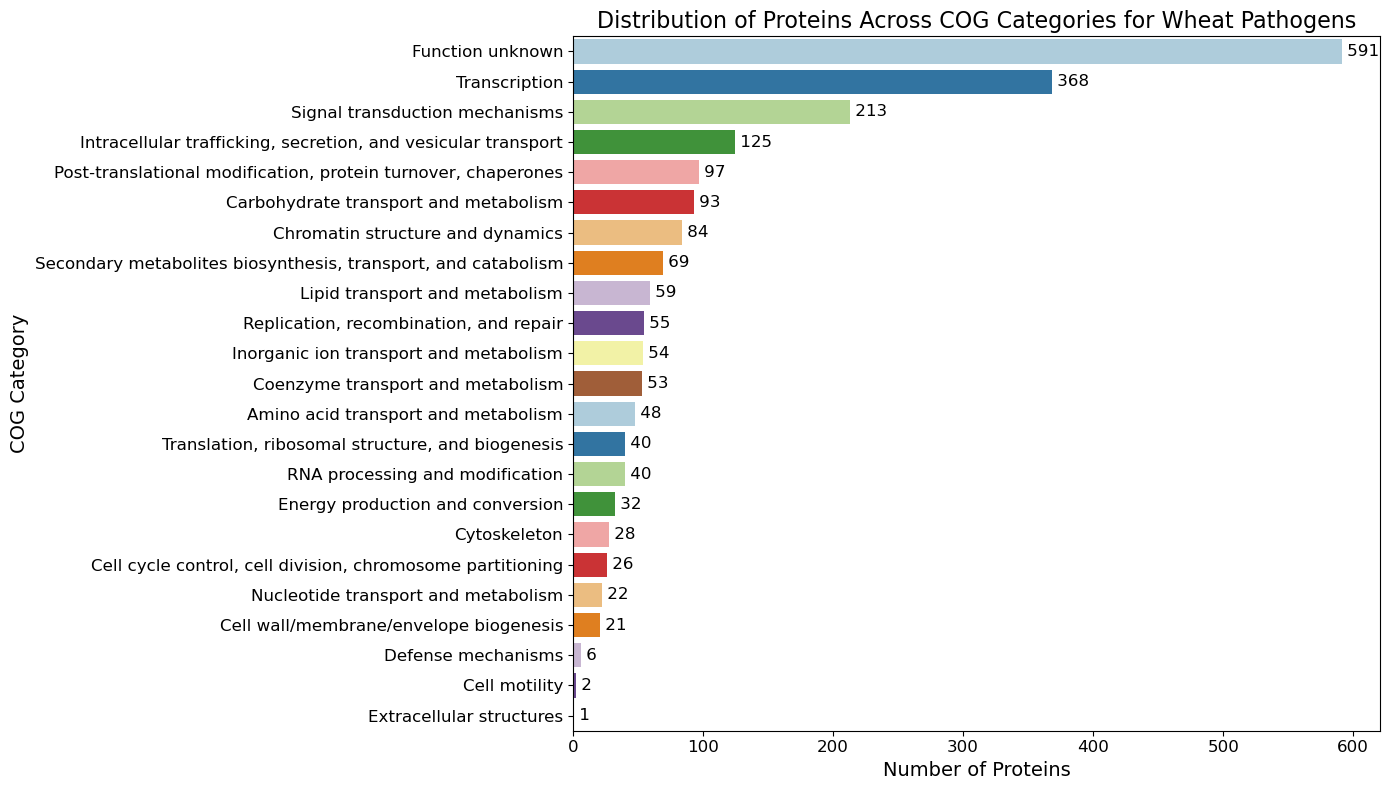

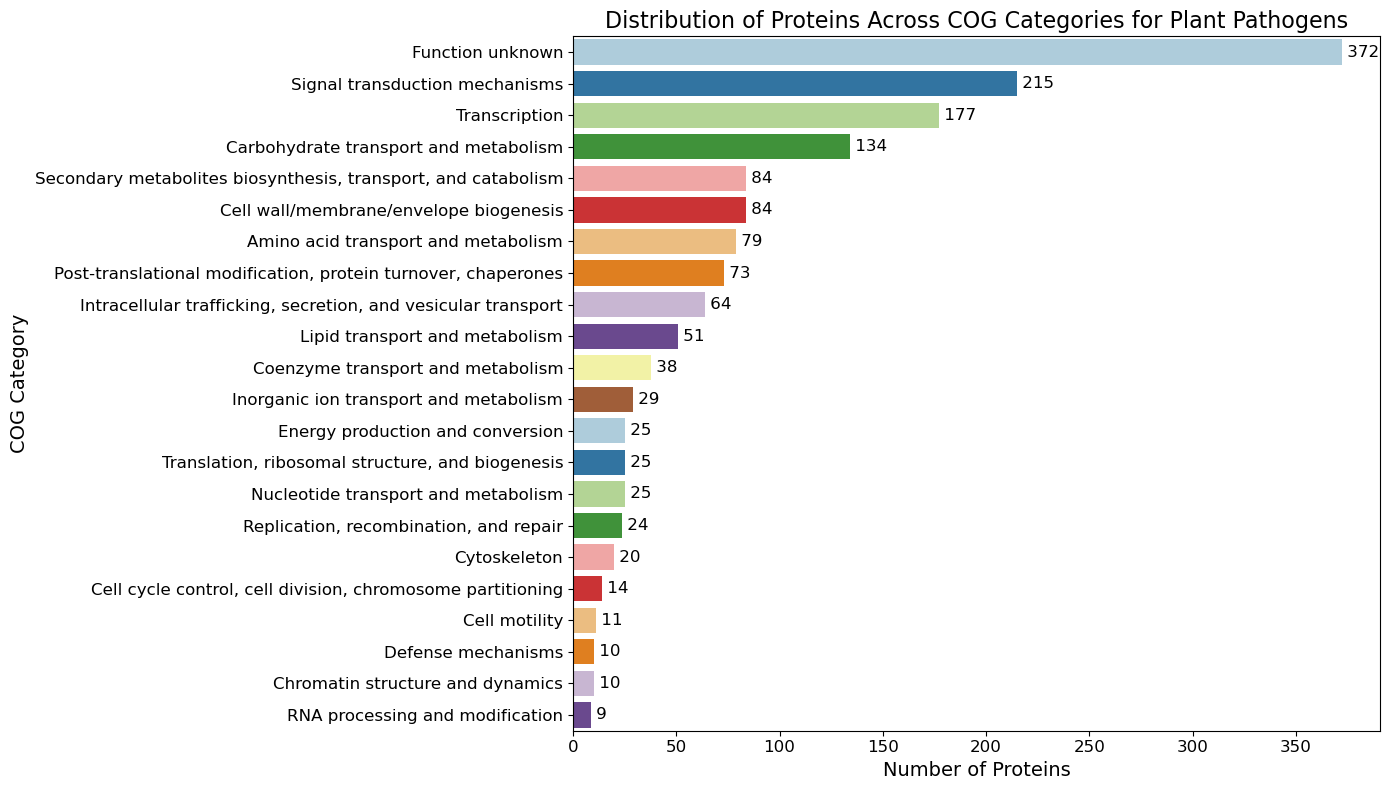

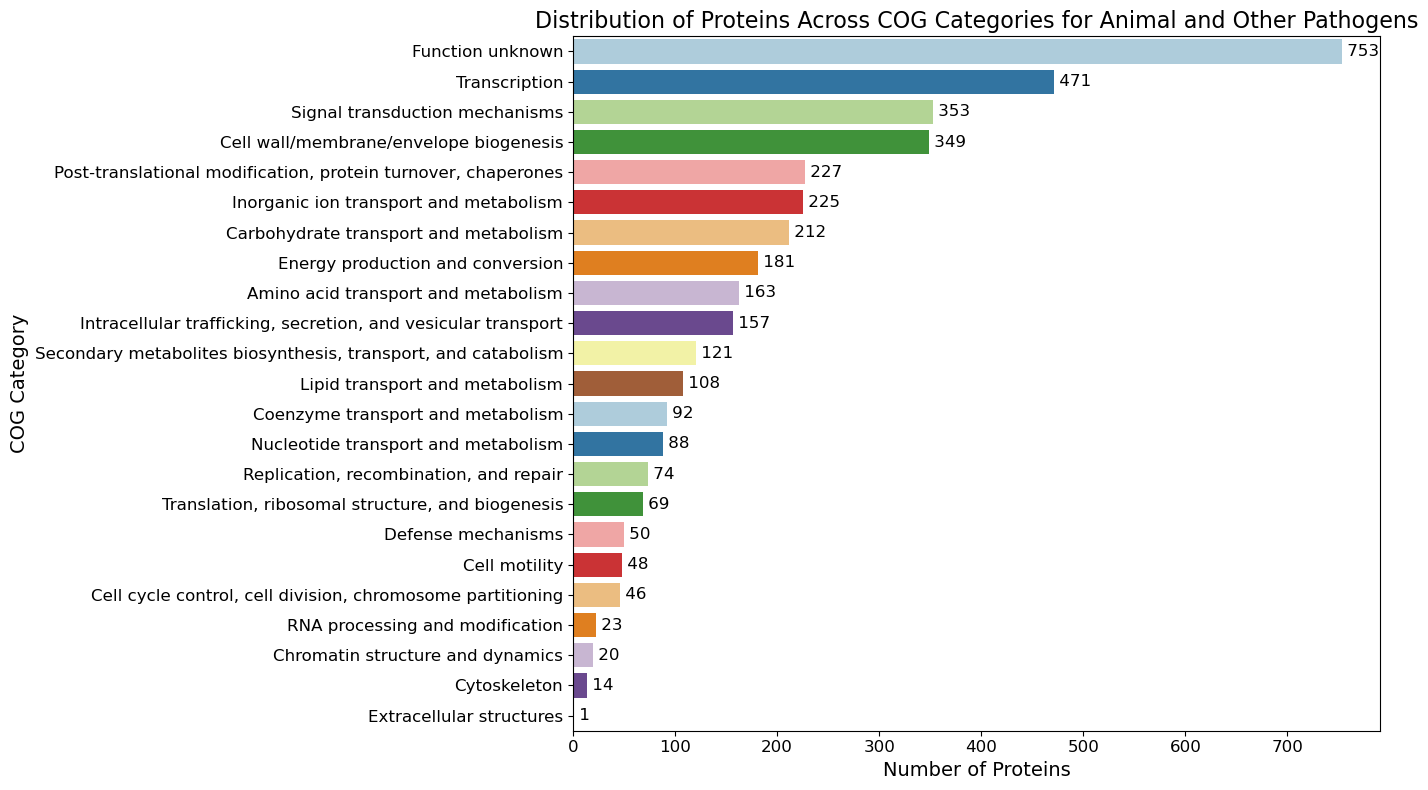

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Assuming df is your DataFrame containing the annotations file and cog_category_mapping is defined

# Function to plot COG category distribution
def plot_cog_distribution(data, title, output_file):
    cog_categories = data['COG_category'].dropna().str.split(',').explode()
    cog_categories = cog_categories[cog_categories.str.len() == 1]
    cog_categories = cog_categories.map(cog_category_mapping)
    cog_summary = cog_categories.value_counts().reset_index()
    cog_summary.columns = ['COG_category', 'Count']
    cog_summary = cog_summary.sort_values(by='Count', ascending=False)

    # Define the color palette
    palette = sns.color_palette("Paired", len(cog_summary))

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Count', y='COG_category', data=cog_summary, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for index, value in enumerate(cog_summary['Count']):
        ax.text(value, index, f' {value}', color='black', va="center", fontsize=12)

    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot COG category distribution for each group with dynamic filenames
plot_cog_distribution(slice_a, 'Distribution of Proteins Across COG Categories for Wheat Pathogens', f'result/cog_category_distribution_wheat_pathogens_{current_time}.svg')
plot_cog_distribution(slice_b, 'Distribution of Proteins Across COG Categories for Plant Pathogens', f'result/cog_category_distribution_plant_pathogens_{current_time}.svg')
plot_cog_distribution(slice_c, 'Distribution of Proteins Across COG Categories for Animal and Other Pathogens', f'result/cog_category_distribution_AnimalAnOther_pathogens_{current_time}.svg')


In [15]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))


C:\Users\urbanm\AppData\Local\Temp\ipykernel_18788\3609150076.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Revised Code - Chat

Total number of proteins displayed in the graph: 7545.0
Total number of wheat proteins: 2127
Total number of plant proteins: 1573.0
Total number of animal proteins: 3845


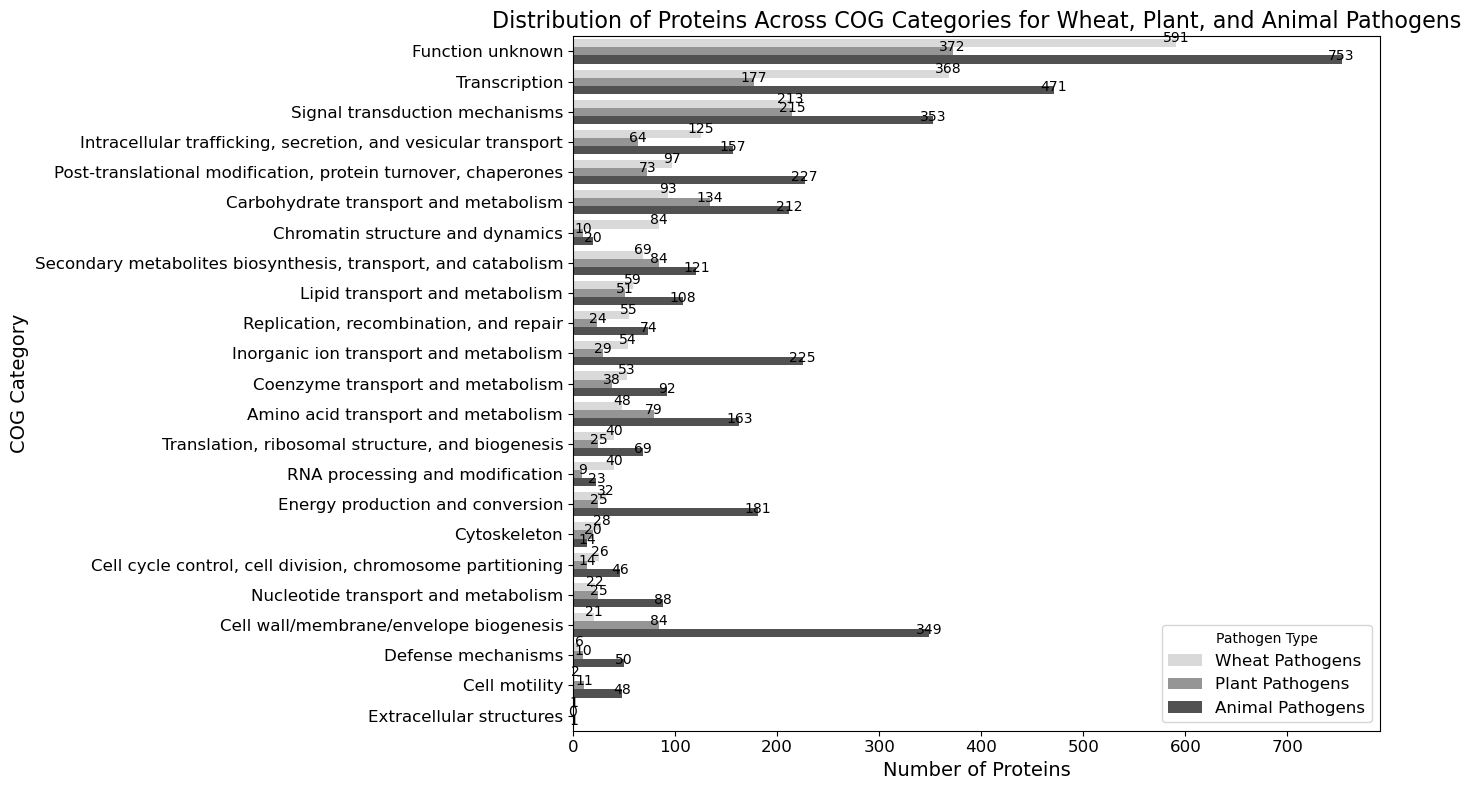

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Assuming df is your DataFrame containing the annotations file and cog_category_mapping is defined

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['COG_category', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['COG_category', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['COG_category'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({'Count_wheat': 'Wheat Pathogens', 'Count_plant': 'Plant Pathogens', 'Count_animal': 'Animal Pathogens'})

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Count', y='COG_category', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count, index - 0.3, f'{int(wheat_count)}', color='black', ha="center", fontsize=10)
        ax.text(plant_count, index, f'{int(plant_count)}', color='black', ha="center", fontsize=10)
        ax.text(animal_count, index + 0.3, f'{int(animal_count)}', color='black', ha="center", fontsize=10)

    #new
    # Calculate the total number of proteins for each pathogen type
    total_wheat = cog_summary['Count_wheat'].sum()
    total_plant = cog_summary['Count_plant'].sum()
    total_animal = cog_summary['Count_animal'].sum()

    # Calculate the grand total
    total_proteins = total_wheat + total_plant + total_animal

    print(f"Total number of proteins displayed in the graph: {total_proteins}")
    # Print out the totals
    print(f"Total number of wheat proteins: {total_wheat}")
    print(f"Total number of plant proteins: {total_plant}")
    print(f"Total number of animal proteins: {total_animal}")
    #/new
        
        
    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=10)
    
    # Add padding to avoid overlap with frame
    plt.subplots_adjust(left=0.25, right=0.85, top=1.00, bottom=0.1)
    
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across COG Categories for Wheat, Plant, and Animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')


Total number of wheat proteins: 2127
Total number of plant proteins: 1573
Total number of animal proteins: 3845
Total number of proteins displayed in the graph: 7545


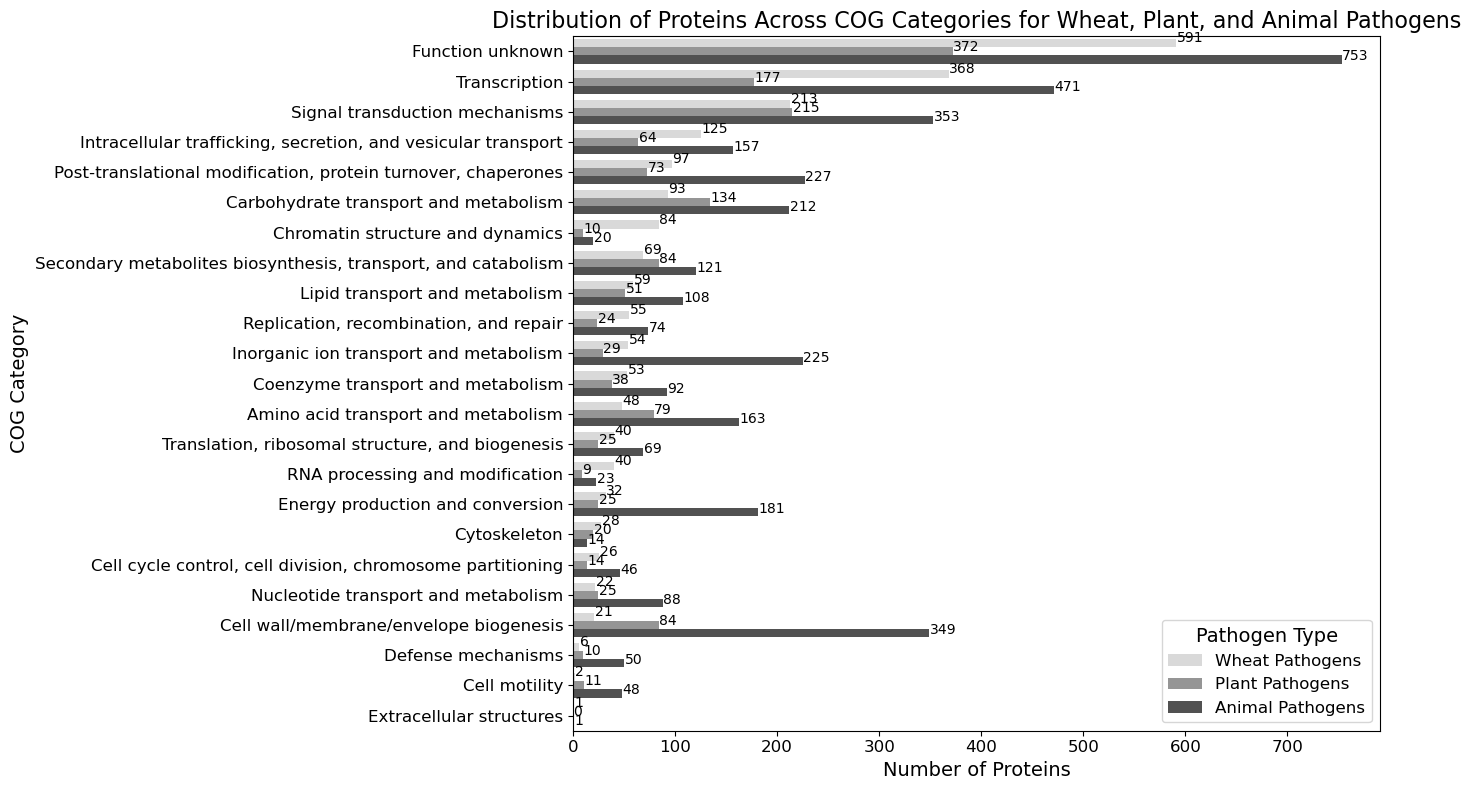

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Assuming df is your DataFrame containing the annotations file and cog_category_mapping is defined

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['COG_category', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['COG_category', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['COG_category'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({'Count_wheat': 'Wheat Pathogens', 'Count_plant': 'Plant Pathogens', 'Count_animal': 'Animal Pathogens'})

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Count', y='COG_category', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Shift numbers to the right for better visibility
    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count + 0.5, index - 0.3, f'{int(wheat_count)}', color='black', ha="left", fontsize=10)
        ax.text(plant_count + 0.5, index, f'{int(plant_count)}', color='black', ha="left", fontsize=10)
        ax.text(animal_count + 0.5, index + 0.3, f'{int(animal_count)}', color='black', ha="left", fontsize=10)

    # Add padding to avoid overlap with frame
    plt.subplots_adjust(left=0.25, right=0.85, top=0.4, bottom=0.1)

   # Print out the totals as integers
    print(f"Total number of wheat proteins: {int(cog_summary['Count_wheat'].sum())}")
    print(f"Total number of plant proteins: {int(cog_summary['Count_plant'].sum())}")
    print(f"Total number of animal proteins: {int(cog_summary['Count_animal'].sum())}")
    print(f"Total number of proteins displayed in the graph: {int(cog_summary['Count_wheat'].sum() + cog_summary['Count_plant'].sum() + cog_summary['Count_animal'].sum())}")
    
    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across COG Categories for Wheat, Plant, and Animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')


### Make summary table

In [19]:
import pandas as pd

# Assuming df is your DataFrame containing the annotations file and the 'Group' column is defined

# Process wheat pathogen data
cog_categories_wheat = df[df['Group'] == 'wheat pathogen']['COG_category'].dropna().str.split(',').explode()
cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

# Process plant pathogen data
cog_categories_plant = df[df['Group'] == 'plant pathogen']['COG_category'].dropna().str.split(',').explode()
cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
cog_summary_plant = cog_categories_plant.value_counts().reset_index()
cog_summary_plant.columns = ['COG_category', 'Count_plant']

# Process animal pathogen data
cog_categories_animal = df[df['Group'] == 'animal pathogen']['COG_category'].dropna().str.split(',').explode()
cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
cog_summary_animal = cog_categories_animal.value_counts().reset_index()
cog_summary_animal.columns = ['COG_category', 'Count_animal']

# Merge the three summaries
cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

# Convert all counts to integers
cog_summary[['Count_wheat', 'Count_plant', 'Count_animal']] = cog_summary[['Count_wheat', 'Count_plant', 'Count_animal']].astype(int)

# Adding a total row
cog_summary.loc['Total'] = cog_summary[['Count_wheat', 'Count_plant', 'Count_animal']].sum()

# Convert totals to integers as well
cog_summary = cog_summary.astype(int, errors='ignore')
# Save the summary table to a CSV file
cog_summary.to_csv('cog_category_distribution_summary.csv', index=False)
# Display the summary table
print(cog_summary)


                                            COG_category  Count_wheat  \
0                                       Function unknown          591   
1                                          Transcription          368   
2                         Signal transduction mechanisms          213   
3      Intracellular trafficking, secretion, and vesi...          125   
4      Post-translational modification, protein turno...           97   
5                  Carbohydrate transport and metabolism           93   
6                       Chromatin structure and dynamics           84   
7      Secondary metabolites biosynthesis, transport,...           69   
8                         Lipid transport and metabolism           59   
9                 Replication, recombination, and repair           55   
10                Inorganic ion transport and metabolism           54   
11                     Coenzyme transport and metabolism           53   
12                   Amino acid transport and metab

### Improvement of Plot layout 2024-09-06

Total number of wheat proteins: 2127
Total number of plant proteins: 1573
Total number of animal proteins: 3845
Total number of proteins displayed in the graph: 7545


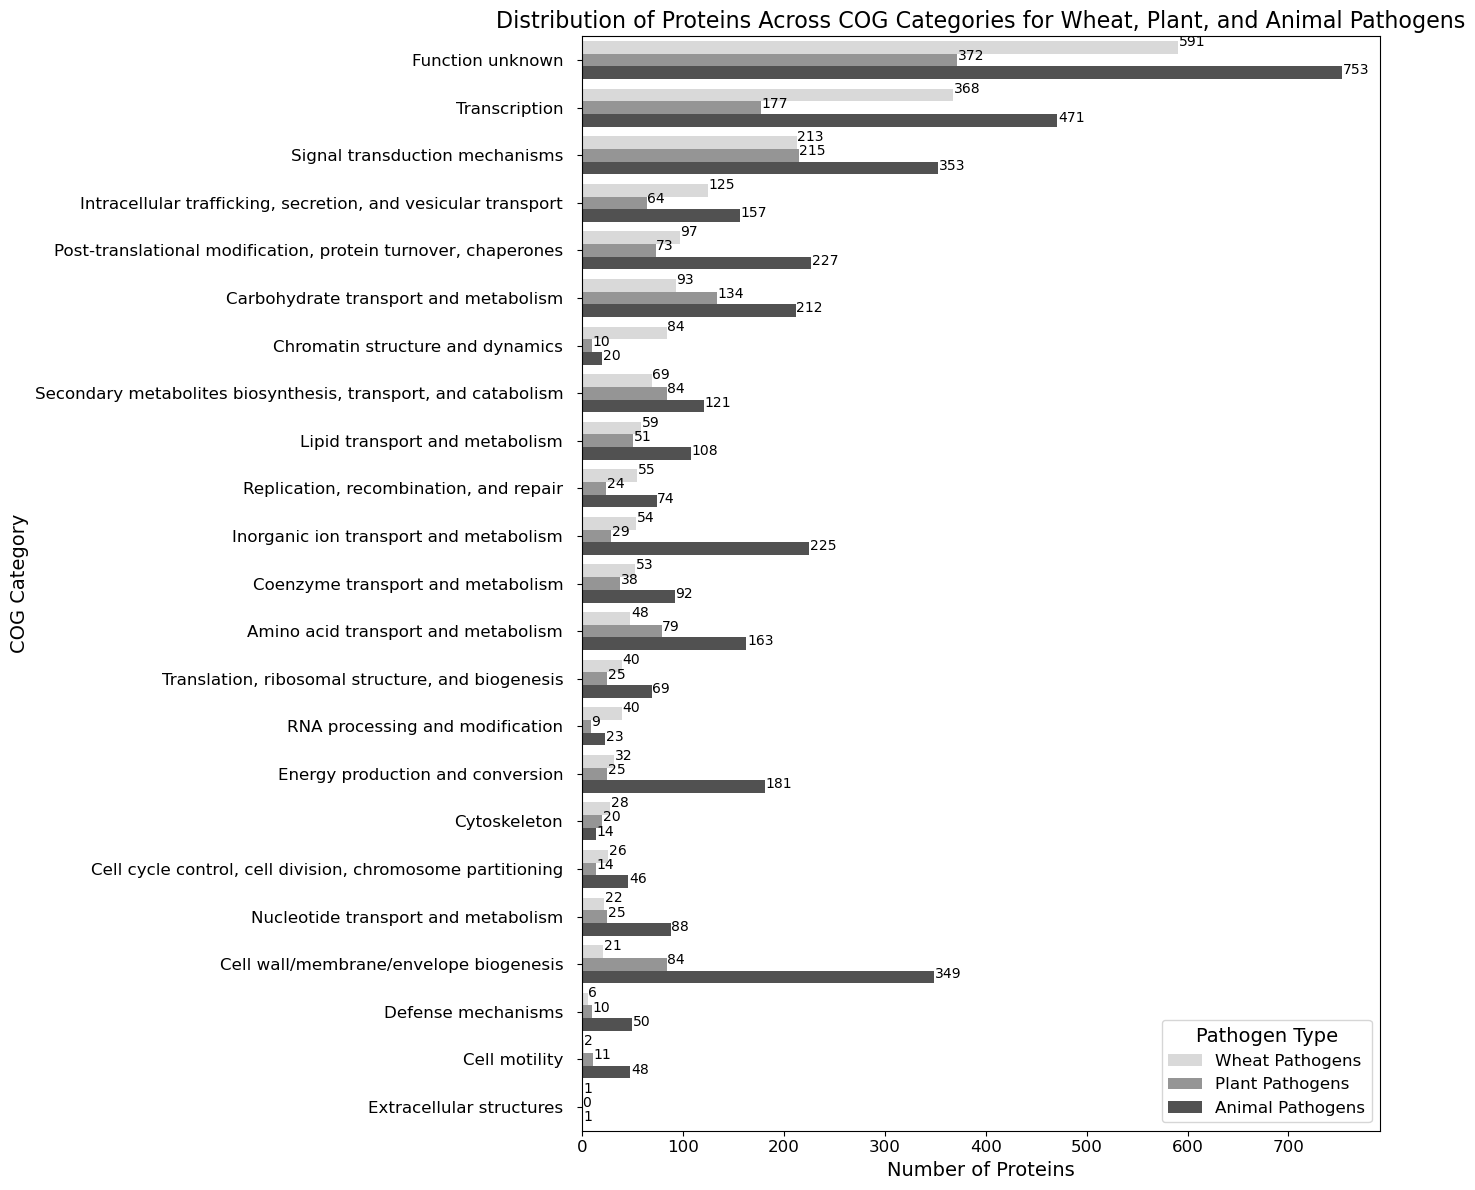

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Assuming df is your DataFrame containing the annotations file and cog_category_mapping is defined

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['COG_category', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['COG_category', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['COG_category'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({'Count_wheat': 'Wheat Pathogens', 'Count_plant': 'Plant Pathogens', 'Count_animal': 'Animal Pathogens'})

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 10))  # Increase height to give more space for Y-axis labels
    ax = sns.barplot(x='Count', y='COG_category', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Shift numbers to the right for better visibility
    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count + 0.5, index - 0.3, f'{int(wheat_count)}', color='black', ha="left", fontsize=10)
        ax.text(plant_count + 0.5, index, f'{int(plant_count)}', color='black', ha="left", fontsize=10)
        ax.text(animal_count + 0.5, index + 0.3, f'{int(animal_count)}', color='black', ha="left", fontsize=10)

    # Adjust padding to provide more space between categories
    plt.subplots_adjust(left=0.35, right=0.85, top=0.9, bottom=0.1)

    # Increase spacing between COG categories on the Y-axis
    ax.set_yticks(ax.get_yticks())  # Set the same tick positions to add extra space
    ax.tick_params(axis='y', which='major', pad=10)  # Add padding to the Y-axis labels

    # Print out the totals as integers
    print(f"Total number of wheat proteins: {int(cog_summary['Count_wheat'].sum())}")
    print(f"Total number of plant proteins: {int(cog_summary['Count_plant'].sum())}")
    print(f"Total number of animal proteins: {int(cog_summary['Count_animal'].sum())}")
    print(f"Total number of proteins displayed in the graph: {int(cog_summary['Count_wheat'].sum() + cog_summary['Count_plant'].sum() + cog_summary['Count_animal'].sum())}")

    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across COG Categories for Wheat, Plant, and Animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')


### Use Aerial font for Figure

Total number of wheat proteins: 2127
Total number of plant proteins: 1573
Total number of animal proteins: 3845
Total number of proteins displayed in the graph: 7545


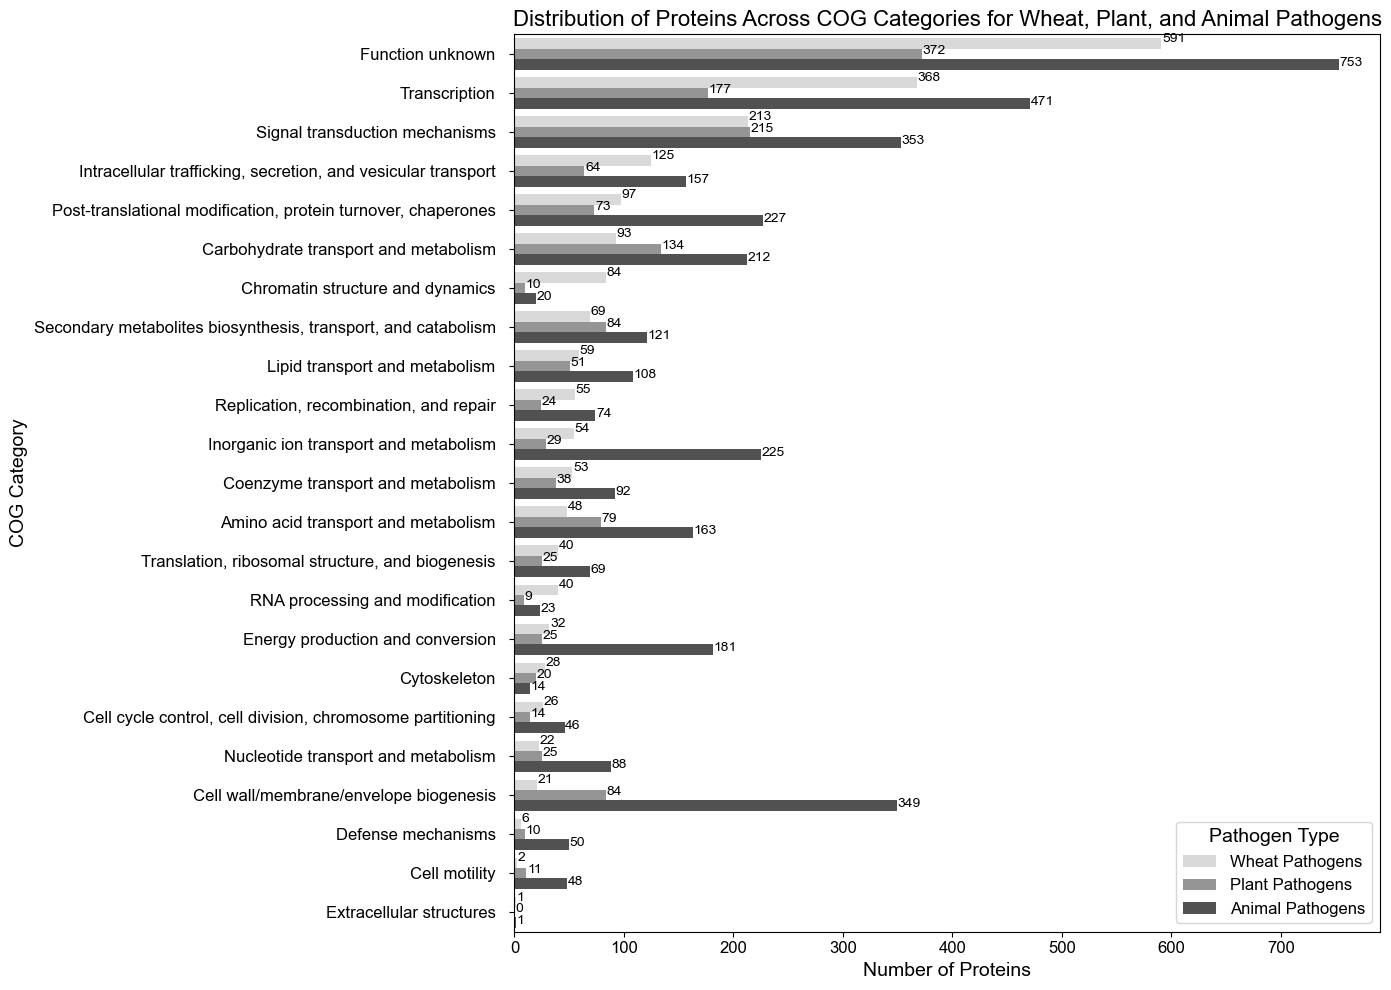

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set Arial font globally for the figure
plt.rcParams['font.family'] = 'Arial'

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['COG_category', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['COG_category', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['COG_category'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({'Count_wheat': 'Wheat Pathogens', 'Count_plant': 'Plant Pathogens', 'Count_animal': 'Animal Pathogens'})

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 10))  # Increase height to give more space for Y-axis labels
    ax = sns.barplot(x='Count', y='COG_category', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Shift numbers to the right for better visibility
    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count + 0.5, index - 0.3, f'{int(wheat_count)}', color='black', ha="left", fontsize=10)
        ax.text(plant_count + 0.5, index, f'{int(plant_count)}', color='black', ha="left", fontsize=10)
        ax.text(animal_count + 0.5, index + 0.3, f'{int(animal_count)}', color='black', ha="left", fontsize=10)

    # Adjust padding to provide more space between categories
    plt.subplots_adjust(left=0.35, right=0.85, top=0.9, bottom=0.1)

    # Increase spacing between COG categories on the Y-axis
    ax.set_yticks(ax.get_yticks())  # Set the same tick positions to add extra space
    ax.tick_params(axis='y', which='major', pad=10)  # Add padding to the Y-axis labels

    # Print out the totals as integers
    print(f"Total number of wheat proteins: {int(cog_summary['Count_wheat'].sum())}")
    print(f"Total number of other plant proteins: {int(cog_summary['Count_plant'].sum())}")
    print(f"Total number of animal proteins: {int(cog_summary['Count_animal'].sum())}")
    print(f"Total number of proteins displayed in the graph: {int(cog_summary['Count_wheat'].sum() + cog_summary['Count_plant'].sum() + cog_summary['Count_animal'].sum())}")

    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across COG Categories for Wheat, otther plant, and animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')


### Change plant pathogen to 'other plant pathogen'

Total number of wheat proteins: 2127
Total number of plant proteins: 1573
Total number of animal proteins: 3845
Total number of proteins displayed in the graph: 7545


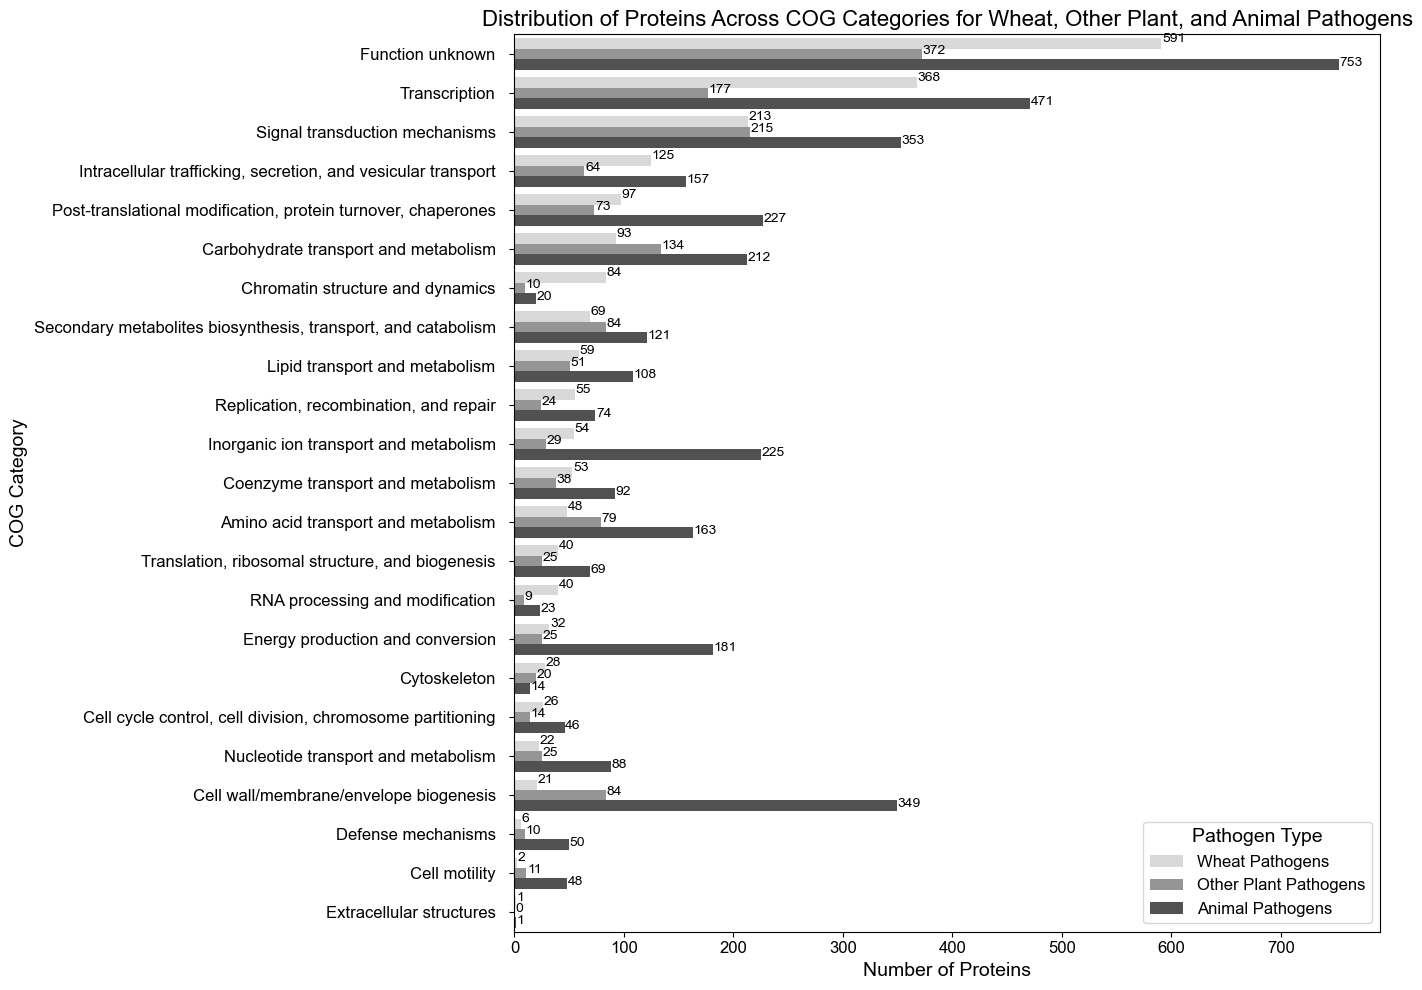

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set Arial font globally for the figure
plt.rcParams['font.family'] = 'Arial'

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['COG_category', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['COG_category', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['COG_category', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='COG_category', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='COG_category', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['COG_category'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')

    # Update legend labels for Pathogen_Type
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({
        'Count_wheat': 'Wheat Pathogens', 
        'Count_plant': 'Other Plant Pathogens', 
        'Count_animal': 'Animal Pathogens'
    })

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 10))  # Increase height to give more space for Y-axis labels
    ax = sns.barplot(x='Count', y='COG_category', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('COG Category', fontsize=14)
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Shift numbers to the right for better visibility
    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count + 0.5, index - 0.3, f'{int(wheat_count)}', color='black', ha="left", fontsize=10)
        ax.text(plant_count + 0.5, index, f'{int(plant_count)}', color='black', ha="left", fontsize=10)
        ax.text(animal_count + 0.5, index + 0.3, f'{int(animal_count)}', color='black', ha="left", fontsize=10)

    # Adjust padding to provide more space between categories
    plt.subplots_adjust(left=0.35, right=0.85, top=0.9, bottom=0.1)

    # Increase spacing between COG categories on the Y-axis
    ax.set_yticks(ax.get_yticks())  # Set the same tick positions to add extra space
    ax.tick_params(axis='y', which='major', pad=10)  # Add padding to the Y-axis labels

    # Print out the totals as integers
    print(f"Total number of wheat proteins: {int(cog_summary['Count_wheat'].sum())}")
    print(f"Total number of plant proteins: {int(cog_summary['Count_plant'].sum())}")
    print(f"Total number of animal proteins: {int(cog_summary['Count_animal'].sum())}")
    print(f"Total number of proteins displayed in the graph: {int(cog_summary['Count_wheat'].sum() + cog_summary['Count_plant'].sum() + cog_summary['Count_animal'].sum())}")

    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across COG Categories for Wheat, Other Plant, and Animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')


### Relabel COG to 'Functional categories'

Total number of wheat proteins: 2127
Total number of plant proteins: 1573
Total number of animal proteins: 3845
Total number of proteins displayed in the graph: 7545


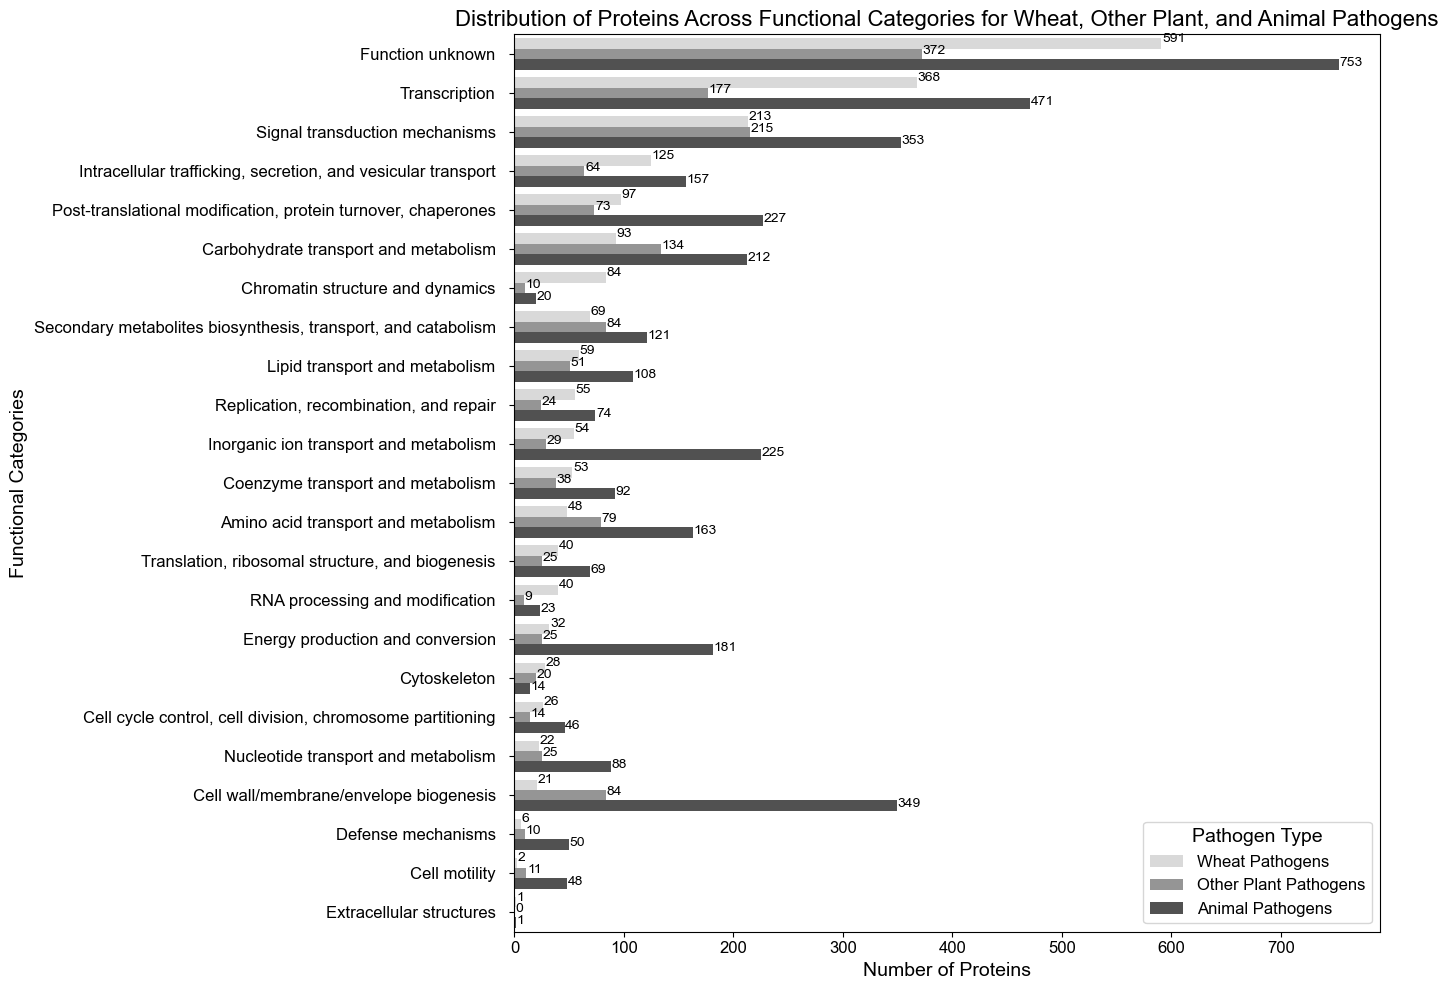

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set Arial font globally for the figure
plt.rcParams['font.family'] = 'Arial'

# Function to plot combined COG category distribution for three groups
def plot_combined_cog_distribution(data_wheat, data_plant, data_animal, title, output_file):
    # Process wheat pathogen data
    cog_categories_wheat = data_wheat['COG_category'].dropna().str.split(',').explode()
    cog_categories_wheat = cog_categories_wheat[cog_categories_wheat.str.len() == 1]
    cog_categories_wheat = cog_categories_wheat.map(cog_category_mapping)
    cog_summary_wheat = cog_categories_wheat.value_counts().reset_index()
    cog_summary_wheat.columns = ['Functional_categories', 'Count_wheat']

    # Process plant pathogen data
    cog_categories_plant = data_plant['COG_category'].dropna().str.split(',').explode()
    cog_categories_plant = cog_categories_plant[cog_categories_plant.str.len() == 1]
    cog_categories_plant = cog_categories_plant.map(cog_category_mapping)
    cog_summary_plant = cog_categories_plant.value_counts().reset_index()
    cog_summary_plant.columns = ['Functional_categories', 'Count_plant']

    # Process animal pathogen data
    cog_categories_animal = data_animal['COG_category'].dropna().str.split(',').explode()
    cog_categories_animal = cog_categories_animal[cog_categories_animal.str.len() == 1]
    cog_categories_animal = cog_categories_animal.map(cog_category_mapping)
    cog_summary_animal = cog_categories_animal.value_counts().reset_index()
    cog_summary_animal.columns = ['Functional_categories', 'Count_animal']

    # Merge the three summaries
    cog_summary = pd.merge(cog_summary_wheat, cog_summary_plant, on='Functional_categories', how='outer').fillna(0)
    cog_summary = pd.merge(cog_summary, cog_summary_animal, on='Functional_categories', how='outer').fillna(0)
    cog_summary = cog_summary.sort_values(by=['Count_wheat', 'Count_plant', 'Count_animal'], ascending=False)

    # Melt the DataFrame for seaborn
    cog_summary_melted = pd.melt(cog_summary, id_vars=['Functional_categories'], value_vars=['Count_wheat', 'Count_plant', 'Count_animal'], var_name='Pathogen_Type', value_name='Count')

    # Update legend labels for Pathogen_Type
    cog_summary_melted['Pathogen_Type'] = cog_summary_melted['Pathogen_Type'].map({
        'Count_wheat': 'Wheat Pathogens', 
        'Count_plant': 'Other Plant Pathogens', 
        'Count_animal': 'Animal Pathogens'
    })

    # Define the color palette (grayscale)
    palette = sns.color_palette("Greys", 3)

    # Plot the combined distribution
    plt.figure(figsize=(14, 10))  # Increase height to give more space for Y-axis labels
    ax = sns.barplot(x='Count', y='Functional_categories', hue='Pathogen_Type', data=cog_summary_melted, palette=palette)
    plt.ylabel('Functional Categories', fontsize=14)  # Changed Y-axis label
    plt.xlabel('Number of Proteins', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Shift numbers to the right for better visibility
    for index, row in cog_summary.iterrows():
        wheat_count = row['Count_wheat']
        plant_count = row['Count_plant']
        animal_count = row['Count_animal']
        ax.text(wheat_count + 0.5, index - 0.3, f'{int(wheat_count)}', color='black', ha="left", fontsize=10)
        ax.text(plant_count + 0.5, index, f'{int(plant_count)}', color='black', ha="left", fontsize=10)
        ax.text(animal_count + 0.5, index + 0.3, f'{int(animal_count)}', color='black', ha="left", fontsize=10)

    # Adjust padding to provide more space between categories
    plt.subplots_adjust(left=0.35, right=0.85, top=0.9, bottom=0.1)

    # Increase spacing between Functional Categories on the Y-axis
    ax.set_yticks(ax.get_yticks())  # Set the same tick positions to add extra space
    ax.tick_params(axis='y', which='major', pad=10)  # Add padding to the Y-axis labels

    # Print out the totals as integers
    print(f"Total number of wheat proteins: {int(cog_summary['Count_wheat'].sum())}")
    print(f"Total number of plant proteins: {int(cog_summary['Count_plant'].sum())}")
    print(f"Total number of animal proteins: {int(cog_summary['Count_animal'].sum())}")
    print(f"Total number of proteins displayed in the graph: {int(cog_summary['Count_wheat'].sum() + cog_summary['Count_plant'].sum() + cog_summary['Count_animal'].sum())}")

    plt.legend(title='Pathogen Type', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file, format='svg')
    plt.show()

# Generate the current date, hour, and minute for dynamic filenames
current_time = datetime.now().strftime('%Y-%m-%d %H%M')

# Create the 'result' folder if it doesn't exist
os.makedirs('result', exist_ok=True)

# Plot combined COG category distribution for the three groups
plot_combined_cog_distribution(slice_a, slice_b, slice_c, 'Distribution of Proteins Across Functional Categories for Wheat, Other Plant, and Animal Pathogens', f'result/cog_category_distribution_combined_{current_time}.svg')
